--- Calibration Data Table ---
    ADC Raw Value  Water %
0            4095        0
1            4076       10
2            3225       20
3            2851       30
4            1713       40
5             855       50
6             774       60
7             651       70
8             434       80
9             271       90
10              0      100




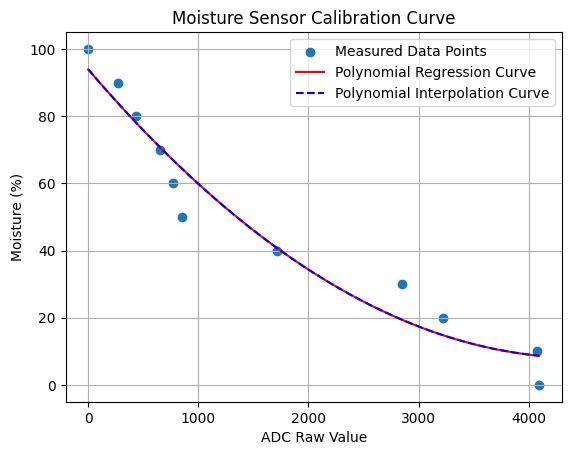


--- Polynomial Regression Results ---
Polynomial coefficients: [ 0.00000000e+00 -3.83561791e-02  4.28297943e-06]
Intercept (a0): 93.92003116191847

--- Polynomial Interpolation Results ---
Polynomial coefficients (a2, a1, a0): [ 4.28297943e-06 -3.83561791e-02  9.39200312e+01]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. Load calibration data from the .csv file
#    Make sure your file is named "calibration.csv" and is in the same folder.
try:
    df = pd.read_csv("calibration.csv")
except FileNotFoundError:
    print("Error: 'calibration.csv' not found. Please create the file with your data.")
    exit()

# Remove rows with missing values in key columns
df.dropna(subset=["ADC Raw Value", "Water %"], inplace=True)

# 2. Print the data table with only the columns used for plotting
print("--- Calibration Data Table ---")
# Select and print only the columns that are plotted
print(df[['ADC Raw Value', 'Water %']].to_string())
print("\n")

# 3. Prepare data for modeling
X = df[["ADC Raw Value"]].values    # Independent variable (ADC raw reading)
y = df["Water %"].values            # Dependent variable (actual moisture)

# 4. Perform Polynomial Regression (degree=2) using scikit-learn
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# 5. Perform Polynomial Interpolation using numpy.polyfit()
interpolation_coeffs = np.polyfit(X.flatten(), y, 2)
# Create a polynomial function from the coefficients
interpolation_poly = np.poly1d(interpolation_coeffs)

# 6. Plot the data and both fitted curves
plt.scatter(X, y, label="Measured Data Points")
X_fit = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

# Regression curve from scikit-learn
y_reg_fit = model.predict(poly.transform(X_fit))
plt.plot(X_fit, y_reg_fit, color="red", label="Polynomial Regression Curve")

# Interpolation curve from numpy
y_interp_fit = interpolation_poly(X_fit)
plt.plot(X_fit, y_interp_fit, color="blue", linestyle="--", label="Polynomial Interpolation Curve")

plt.xlabel("ADC Raw Value")
plt.ylabel("Moisture (%)")
plt.title("Moisture Sensor Calibration Curve")
plt.legend()
plt.grid(True)
plt.show()

# 7. Print coefficients for both methods
print("\n--- Polynomial Regression Results ---")
print("Polynomial coefficients:", model.coef_)
print("Intercept (a0):", model.intercept_)

print("\n--- Polynomial Interpolation Results ---")
print("Polynomial coefficients (a2, a1, a0):", interpolation_coeffs)
